In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('classification_lab_data.csv')

In [8]:
pd.set_option('display.max_columns', 500)

In [9]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


In [16]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [17]:
df = df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'def'})

In [18]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0


# Train/Test Split

In [20]:
from sklearn.model_selection import train_test_split

features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 
            'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

X = df[features]
y = df['def']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

# Initial Machine Learning using Decision Tree to establish baseline

## F1

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV

parameters={'criterion': ['gini','entropy'], 'min_samples_leaf' : range(5,100,15), 'max_depth': range(2,20,1)}


grid_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring= 'f1')

grid_tree.fit(X_train, y_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)


0.47382126761272947
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 20}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


## Accuracy

In [22]:
parameters={'criterion': ['gini','entropy'], 'min_samples_leaf' : range(5,100,15), 'max_depth': range(2,20,1)}


grid_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5, scoring= 'accuracy')

grid_tree.fit(X_train, y_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.8225428407729569
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [23]:
df['def'].value_counts()

0    18691
1     5308
Name: def, dtype: int64

### We suspect that there is a sample imbalance because of a low F1 and high accuracy score. As seen above, there are 3 times more non-defaults than defaults.

# Data Exploration

In [24]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def
count,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000,23999.000000
mean,167825.729405,1.603608,1.856786,1.550773,35.523230,-0.014959,-0.134839,-0.165632,-0.217092,-0.261344,-0.285845,51589.034710,49521.698112,4.747483e+04,43796.589775,40748.049169,39226.852411,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943,0.221176
std,129915.115993,0.489158,0.791939,0.522431,9.253986,1.120903,1.193044,1.193515,1.168719,1.133016,1.150394,74104.132627,71551.215125,7.001082e+04,64927.450125,61257.537699,60075.536736,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322,0.415047
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-67526.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.500000,2958.000000,2.718000e+03,2392.500000,1801.000000,1280.000000,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22472.000000,21290.000000,2.022300e+04,19145.000000,18227.000000,17175.000000,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67767.000000,64635.500000,6.096200e+04,55418.000000,50581.000000,49434.500000,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [25]:
df.MARRIAGE.value_counts()

2    12735
1    10958
3      263
0       43
Name: MARRIAGE, dtype: int64

#### The value of 0 in Marriage is undefined so we will group it with 3, others.

In [35]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [36]:
df.MARRIAGE.value_counts()

2    12735
1    10958
3      306
Name: MARRIAGE, dtype: int64

In [37]:
df.EDUCATION.value_counts()

2    11188
1     8442
3     3994
5      223
4      100
6       41
0       11
Name: EDUCATION, dtype: int64

In [38]:
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6], 4)

In [39]:
df.EDUCATION.value_counts()

2    11188
1     8442
3     3994
4      375
Name: EDUCATION, dtype: int64

In [41]:
import matplotlib.pyplot as plt

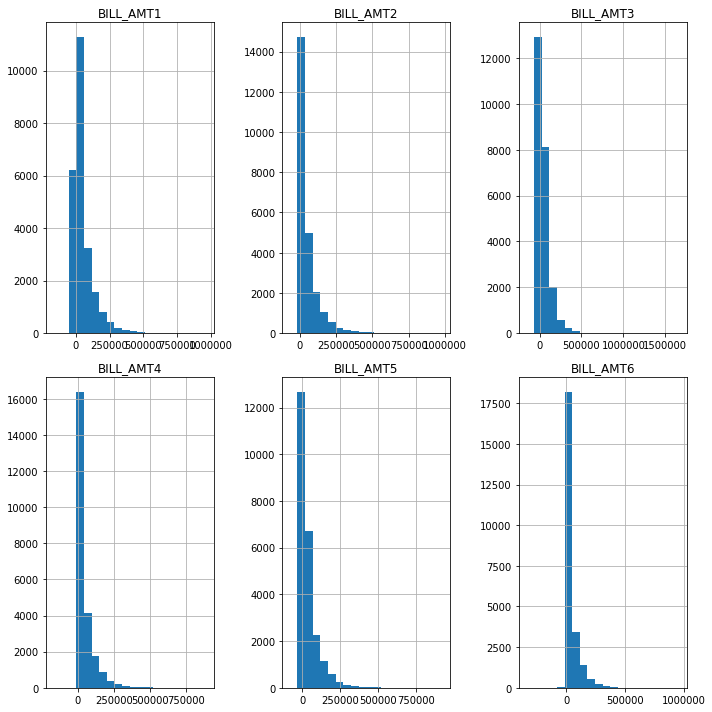

In [43]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure(figsize=(10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

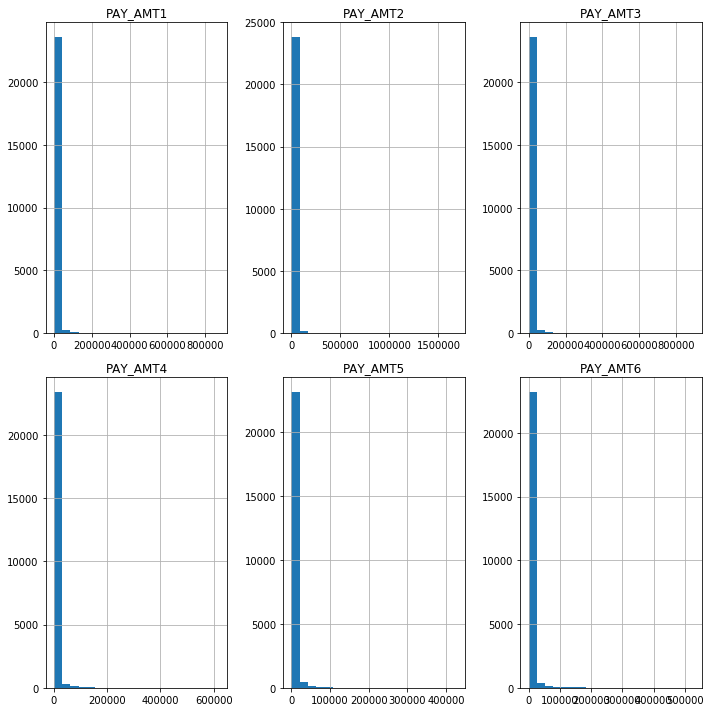

In [44]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

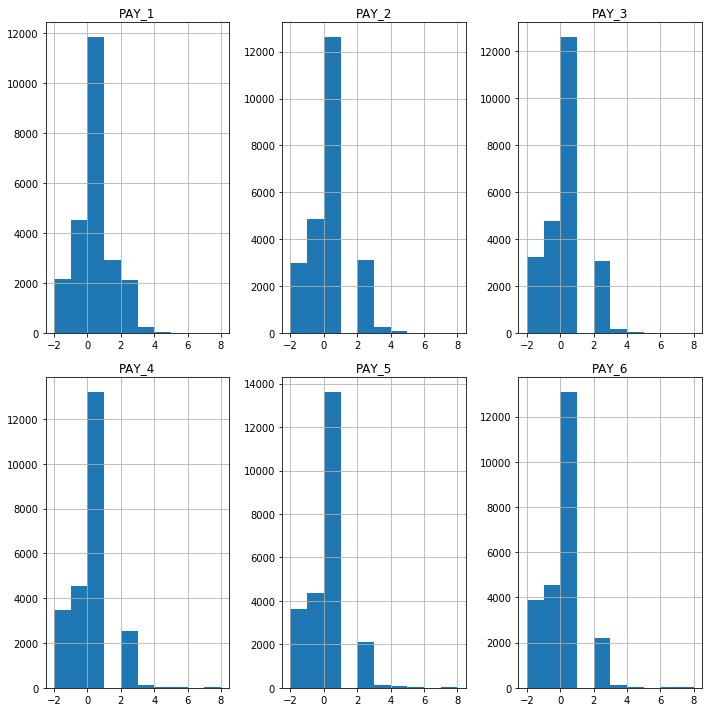

In [45]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

#### We noticed there are some undefined Pay Status values. We decided to assume that all values less than 1 will be -1.

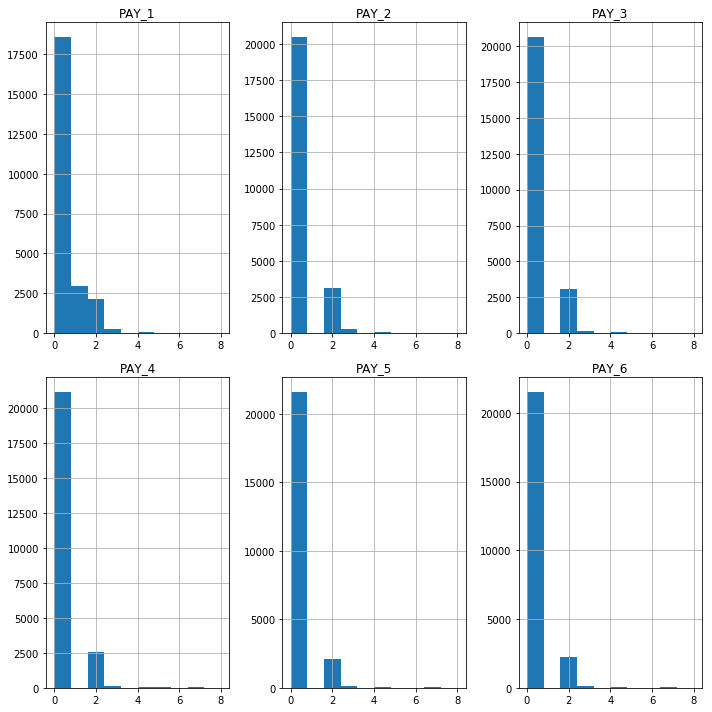

In [46]:
FIX = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[FIX, 'PAY_1'] = 0
FIX = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[FIX, 'PAY_2'] = 0
FIX = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[FIX, 'PAY_3'] = 0
FIX = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[FIX, 'PAY_4'] = 0
FIX = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[FIX, 'PAY_5'] = 0
FIX = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[FIX, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [49]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,23999.000000,2.399900e+04,23999.000000,23999.000000,23999.000000,23999.000000
mean,5687.720113,6.019571e+03,5253.322805,4824.490687,4825.033793,5245.642943
std,16698.506577,2.454136e+04,17967.028860,15730.753527,15596.580167,17795.775322
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.585000e+02,395.000000,300.000000,269.500000,125.000000
50%,2110.000000,2.012000e+03,1809.000000,1500.000000,1500.000000,1500.000000
75%,5020.000000,5.000000e+03,4561.000000,4089.000000,4029.500000,4008.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


In [51]:
df.groupby(['SEX', 'def']).size()

SEX  def
1    0       7215
     1       2298
2    0      11476
     1       3010
dtype: int64

In [55]:
gender = df.groupby(['def', 'SEX']).size().unstack(1)

In [60]:
import numpy as np

([<matplotlib.axis.XTick at 0x1a289aef60>,
 <a list of 2 Text xticklabel objects>)

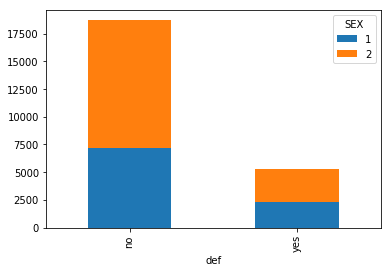

In [62]:
gender.plot(kind='bar', stacked= True)
plt.xticks(np.arange(2), ('no', 'yes'))

In [63]:
gender = df.groupby(['SEX', 'def']).size().unstack(1)

([<matplotlib.axis.XTick at 0x1a27b787b8>,
 <a list of 2 Text xticklabel objects>)

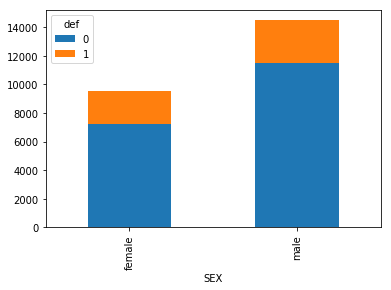

In [66]:
gender.plot(kind='bar', stacked= True)
plt.xticks(np.arange(2), ('female', 'male'))

### We want to see if Gender or Marital Status has an effect on default rate.

#### Creating a new feature called SEX_MAR that represents the interaction between gender and marital status.

In [68]:
df['SEX_MAR'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SEX_MAR'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SEX_MAR'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SEX_MAR'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SEX_MAR'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SEX_MAR'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SEX_MAR'] = 6 #divorced woman

In [69]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def,SEX_MAR
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,2
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,1
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,2
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,4
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,2


In [73]:
MAR_STAT = df.groupby(['SEX_MAR', 'def']).size().unstack(1)

([<matplotlib.axis.XTick at 0x1a28f925f8>,
 <a list of 6 Text xticklabel objects>)

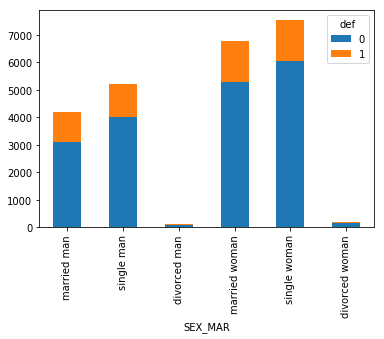

In [76]:
MAR_STAT.plot(kind='bar', stacked= True)
plt.xticks(np.arange(6), ('married man', 'single man', 'divorced man', 'married woman', 'single woman', 'divorced woman'))


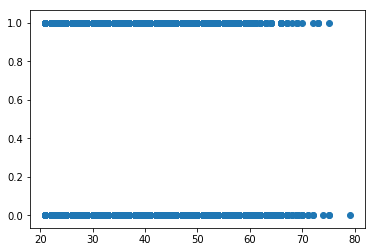

In [79]:
plt.scatter(x=df['AGE'], y = df['def'])

The tendency to default is not dependent on age.

## The payment are made for the previous month bill; Therefore, PAY_AMT5 is the payment of BILL_AMT6 and so on.
### 1 = Sept   2= Aug   3 = Jul   4 = June   5= May   6 = April
### Payment in May is made for Bill in April, resulting in outstanding in May ==> BILL_AMT6 - PAY_AMT5 = OUTSTANDING_5
### OUTSTANDING in may + amount spent in May  = Bill amount in may = BILL_AMT5
### ==> SPENT5 = BILL_AMT5 - OUTSTANDING5

In [81]:
#Calculating outstanding amount
for i in range(1,6):
    df['OUTSTANDING_{}'.format(i)] = df['BILL_AMT{}'.format(i+1)]- df['PAY_AMT{}'.format(i)]

In [82]:
for i in range(1,6):
    df['SPENDING_{}'.format(i)] = df['BILL_AMT{}'.format(i)]- df['OUTSTANDING_{}'.format(i)]

In [83]:
for i in range(1,6):
    df['SPENDING_RATIO{}'.format(i)] = abs(round(df['SPENDING_{}'.format(i)]/df['LIMIT_BAL'],3))

In [84]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def,SEX_MAR,OUTSTANDING_1,OUTSTANDING_2,OUTSTANDING_3,OUTSTANDING_4,OUTSTANDING_5,SPENDING_1,SPENDING_2,SPENDING_3,SPENDING_4,SPENDING_5,SPENDING_RATIO1,SPENDING_RATIO2,SPENDING_RATIO3,SPENDING_RATIO4,SPENDING_RATIO5
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,2,87795,89525,91277,89418,98228,2436,1122,1032,4462,1190,0.049,0.022,0.021,0.089,0.024
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,1,20199,17273,14469,14253,9714,694,4933,4804,2216,4956,0.023,0.164,0.160,0.074,0.165
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,2,99796,97589,73289,54138,37334,58915,32207,28432,22561,19404,0.227,0.124,0.109,0.087,0.075
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,4,21944,24988,24637,19131,9774,1818,956,2351,6106,12357,0.009,0.005,0.012,0.031,0.062
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,2,14064,15064,16064,17064,17412,550,558,278,589,285,0.011,0.011,0.006,0.012,0.006


In [85]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def',
       'SEX_MAR', 'OUTSTANDING_1', 'OUTSTANDING_2', 'OUTSTANDING_3',
       'OUTSTANDING_4', 'OUTSTANDING_5', 'SPENDING_1', 'SPENDING_2',
       'SPENDING_3', 'SPENDING_4', 'SPENDING_5', 'SPENDING_RATIO1',
       'SPENDING_RATIO2', 'SPENDING_RATIO3', 'SPENDING_RATIO4',
       'SPENDING_RATIO5'],
      dtype='object')

In [98]:
df['AVG_SPEND'] = np.divide((df['SPENDING_1']+ df['SPENDING_2']+
       df['SPENDING_3']+ df['SPENDING_4']+ df['SPENDING_5']), 5)

In [99]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def,SEX_MAR,OUTSTANDING_1,OUTSTANDING_2,OUTSTANDING_3,OUTSTANDING_4,OUTSTANDING_5,SPENDING_1,SPENDING_2,SPENDING_3,SPENDING_4,SPENDING_5,SPENDING_RATIO1,SPENDING_RATIO2,SPENDING_RATIO3,SPENDING_RATIO4,SPENDING_RATIO5,AVG_SPEND
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,2,87795,89525,91277,89418,98228,2436,1122,1032,4462,1190,0.049,0.022,0.021,0.089,0.024,2048.4
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,1,20199,17273,14469,14253,9714,694,4933,4804,2216,4956,0.023,0.164,0.160,0.074,0.165,3520.6
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,2,99796,97589,73289,54138,37334,58915,32207,28432,22561,19404,0.227,0.124,0.109,0.087,0.075,32303.8
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,4,21944,24988,24637,19131,9774,1818,956,2351,6106,12357,0.009,0.005,0.012,0.031,0.062,4717.6
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,2,14064,15064,16064,17064,17412,550,558,278,589,285,0.011,0.011,0.006,0.012,0.006,452.0


In [100]:
df['AVG_SPEND_RAT'] = np.divide((df['SPENDING_RATIO1']+ df['SPENDING_RATIO2']+
       df['SPENDING_RATIO3']+ df['SPENDING_RATIO4']+ df['SPENDING_RATIO5']), 5)

In [102]:
df['AVG_OUTSTAND'] = np.divide((df['OUTSTANDING_1']+ df['OUTSTANDING_2']+
       df['OUTSTANDING_3']+ df['OUTSTANDING_4']+ df['OUTSTANDING_5']), 5)

In [103]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def,SEX_MAR,OUTSTANDING_1,OUTSTANDING_2,OUTSTANDING_3,OUTSTANDING_4,OUTSTANDING_5,SPENDING_1,SPENDING_2,SPENDING_3,SPENDING_4,SPENDING_5,SPENDING_RATIO1,SPENDING_RATIO2,SPENDING_RATIO3,SPENDING_RATIO4,SPENDING_RATIO5,AVG_SPEND,AVG_SPEND_RAT,AVG_OUTSTAND
0,50000,1,2,2,49,0,0,0,0,0,0,90231,90647,92309,93880,99418,101392,2852,2784,2603,10000,3164,2868,1,2,87795,89525,91277,89418,98228,2436,1122,1032,4462,1190,0.049,0.022,0.021,0.089,0.024,2048.4,0.0410,91248.6
1,30000,1,2,1,39,0,0,0,0,0,0,20893,22206,19273,16469,14670,11214,2007,2000,2000,417,1500,1500,0,1,20199,17273,14469,14253,9714,694,4933,4804,2216,4956,0.023,0.164,0.160,0.074,0.165,3520.6,0.1172,15181.6
2,260000,1,1,2,27,0,0,0,0,0,0,158711,129796,101721,76699,56738,39134,30000,4132,3410,2600,1800,1200,0,2,99796,97589,73289,54138,37334,58915,32207,28432,22561,19404,0.227,0.124,0.109,0.087,0.075,32303.8,0.1244,72429.2
3,200000,2,2,1,33,0,0,0,0,0,0,23762,25944,26988,25237,22131,13774,4000,2000,600,3000,4000,100,0,4,21944,24988,24637,19131,9774,1818,956,2351,6106,12357,0.009,0.005,0.012,0.031,0.062,4717.6,0.0238,20094.8
4,50000,1,1,2,27,0,0,0,0,0,0,14614,15622,16342,17653,17697,18068,1558,1278,1589,633,656,783,0,2,14064,15064,16064,17064,17412,550,558,278,589,285,0.011,0.011,0.006,0.012,0.006,452.0,0.0092,15933.6


# Balancing

In [104]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def',
       'SEX_MAR', 'OUTSTANDING_1', 'OUTSTANDING_2', 'OUTSTANDING_3',
       'OUTSTANDING_4', 'OUTSTANDING_5', 'SPENDING_1', 'SPENDING_2',
       'SPENDING_3', 'SPENDING_4', 'SPENDING_5', 'SPENDING_RATIO1',
       'SPENDING_RATIO2', 'SPENDING_RATIO3', 'SPENDING_RATIO4',
       'SPENDING_RATIO5', 'AVG_SPEND', 'AVG_SPEND_RAT', 'AVG_OUTSTAND'],
      dtype='object')

In [105]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX_MAR','AVG_SPEND', 'AVG_SPEND_RAT', 'AVG_OUTSTAND']

In [106]:
X = df[features].copy()
y = df['def'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [107]:
df_train = X_train.join(y_train)

In [108]:
from sklearn.utils import resample

In [111]:
df_train['def'].value_counts()

0    14907
1     4292
Name: def, dtype: int64

## Upsample

In [114]:
df_nodef = df_train[df_train['def']==0]
df_yesdef = df_train[df_train['def']==1]

In [118]:
df_yesdef_upsampled = resample(df_yesdef, 
                                 replace=True,
                                 n_samples=len(df_nodef['def'])) 

df_upsampled = pd.concat([df_nodef, df_yesdef_upsampled])

df_upsampled['def'].value_counts()


1    14907
0    14907
Name: def, dtype: int64

In [129]:
df_upsampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_MAR,AVG_SPEND,AVG_SPEND_RAT,AVG_OUTSTAND,def
10582,80000,1,1,1,47,0,0,0,0,0,0,49735,25144,7905,7905,20616,7727,25144,8000,0,20616,7727,6191,1,20699.0,0.2588,1562.0,0
7055,260000,2,3,1,54,0,0,0,0,0,0,9760,5465,2504,15809,3756,9560,5484,2504,16593,3764,11092,963,4,7927.4,0.0306,-468.6,0
18093,350000,1,3,1,41,0,0,0,0,0,0,349125,338832,296868,237193,233591,237351,12005,10095,8389,8474,7640,6847,1,31675.4,0.0906,259446.4,0
9654,60000,2,3,1,48,0,0,0,0,0,0,49890,51060,52236,54362,55458,56767,2000,2000,3000,2000,2200,2500,4,864.6,0.0146,51736.6,0
10738,20000,1,2,1,45,0,0,0,0,0,0,13243,11699,12372,0,-800,0,1500,5017,0,0,800,0,1,4112.0,0.2056,3190.8,0


In [130]:
y_train = df_upsampled['def']
X_train = df_upsampled.drop('def', axis=1)
# upsampled_dt = DecisionTreeClassifier(max_depth=5)
upsampled_lr = LogisticRegression(solver='liblinear')
# upsampled_dt.fit(X_train, y_train)
upsampled_lr.fit(X_train, y_train)
# upsampled_pred = upsampled_dt.predict(X_test)
upsampled_pred = upsampled_lr.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, upsampled_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, upsampled_pred))

Test Accuracy score:  0.5520833333333334
Test F1 score:  0.4007803790412486


## Smote

In [123]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(ratio=1.0)

X_SMOTE, y_SMOTE = sm.fit_sample( X= X_train, y = y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

29814
14907


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score


In [128]:
# smote_dt = DecisionTreeClassifier(max_depth=5)
smote_lr = LogisticRegression(solver='liblinear')


# smote_dt.fit(X_train, y_train)
smote_lr.fit(X_train, y_train)


# smote_pred = smote_dt.predict(X_test)
smote_pred = smote_lr.predict(X_test)



# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))


# checking accuracy
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.7883333333333333
Test F1 score:  0.0


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


# Down Sampling

In [132]:
df_nodef_downsampled = resample(df_nodef, 
                                 replace=True,
                                 n_samples=len(df_yesdef['def']))

df_downsampled = pd.concat([df_nodef_downsampled,df_yesdef])
df_downsampled['def'].value_counts()

1    4292
0    4292
Name: def, dtype: int64

In [133]:
y_train = df_downsampled['def']
X_train = df_downsampled.drop('def', axis=1)
# upsampled_dt = DecisionTreeClassifier(max_depth=5)
downsampled_lr = LogisticRegression(solver='liblinear')
# upsampled_dt.fit(X_train, y_train)
downsampled_lr.fit(X_train, y_train)
# upsampled_pred = upsampled_dt.predict(X_test)
downsampled_pred = downsampled_lr.predict(X_test)
# checking accuracy
print('Test Accuracy score: ', accuracy_score(y_test, downsampled_pred))
# checking accuracy
print('Test F1 score: ', f1_score(y_test, downsampled_pred))

Test Accuracy score:  0.554375
Test F1 score:  0.3989884799100871


## Tomek Links

In [134]:
from collections import Counter
from imblearn.under_sampling import TomekLinks

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [138]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 13842, 1: 4184})


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for d in range(1,21):    
    clf = RandomForestClassifier(n_estimators=100, max_depth=d,
                                 random_state=0)
    clf.fit(X_train, y_train)
    train_predict = clf.predict(X_train)    
    test_predict = clf.predict(X_test)
    print(np.bincount(train_predict), np.bincount(test_predict))
    print("Training F1 Score:",metrics.f1_score(y_train, train_predict))
    print("Testing F1 Score:",metrics.f1_score(y_test, test_predict))

[18619   580] [4627  173]
Training F1 Score: 0.19185558354324098
Testing F1 Score: 0.19429452582883577
[18257   942] [4516  284]
Training F1 Score: 0.2742879438158408
Testing F1 Score: 0.3039772727272727
[17681  1518] [4367  433]
Training F1 Score: 0.37039635215713784
Testing F1 Score: 0.4071933204881182
[17570  1629] [4330  470]
Training F1 Score: 0.39566488904180286
Testing F1 Score: 0.42910915934755334
[17368  1831] [4289  511]
Training F1 Score: 0.43358270989193687
Testing F1 Score: 0.4489296636085627
[17335  1864] [4277  523]
Training F1 Score: 0.45171957671957674
Testing F1 Score: 0.45780206435944143
[17075  2124] [4220  580]
Training F1 Score: 0.4974635383639823
Testing F1 Score: 0.48004694835680745
[17086  2113] [4216  584]
Training F1 Score: 0.51738923296808
Testing F1 Score: 0.48009367681498827
[17073  2126] [4211  589]
Training F1 Score: 0.5584786053882725
Testing F1 Score: 0.47869235259778176
[17044  2155] [4208  592]
Training F1 Score: 0.5985171162643951
Testing F1 Score: 

In [145]:
import warnings
warnings.filterwarnings('ignore')

In [147]:
classifier_list = [DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"), 
                    RandomForestClassifier(n_estimators = 100, class_weight = "balanced"),]

In [155]:
from sklearn.model_selection import KFold


In [157]:
performance

,Model,Score,Fold
0,DecisionTreeClassifier,0.482133,1
1,RandomForestClassifier,0.436306,1
2,DecisionTreeClassifier,0.535853,2
3,RandomForestClassifier,0.462366,2
4,DecisionTreeClassifier,0.522552,3
5,RandomForestClassifier,0.435407,3
6,DecisionTreeClassifier,0.527149,4
7,RandomForestClassifier,0.440323,4
8,DecisionTreeClassifier,0.513043,5
9,RandomForestClassifier,0.436975,5


# Train/Test

We decided to use the upsampled data and Decision Tree Classifier KFold = 4

In [170]:
df_upsampled.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_MAR,AVG_SPEND,AVG_SPEND_RAT,AVG_OUTSTAND,def
10582,80000,1,1,1,47,0,0,0,0,0,0,49735,25144,7905,7905,20616,7727,25144,8000,0,20616,7727,6191,1,20699.0,0.2588,1562.0,0
7055,260000,2,3,1,54,0,0,0,0,0,0,9760,5465,2504,15809,3756,9560,5484,2504,16593,3764,11092,963,4,7927.4,0.0306,-468.6,0
18093,350000,1,3,1,41,0,0,0,0,0,0,349125,338832,296868,237193,233591,237351,12005,10095,8389,8474,7640,6847,1,31675.4,0.0906,259446.4,0
9654,60000,2,3,1,48,0,0,0,0,0,0,49890,51060,52236,54362,55458,56767,2000,2000,3000,2000,2200,2500,4,864.6,0.0146,51736.6,0
10738,20000,1,2,1,45,0,0,0,0,0,0,13243,11699,12372,0,-800,0,1500,5017,0,0,800,0,1,4112.0,0.2056,3190.8,0


In [171]:
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_train)):
    training = df_upsampled.iloc[train_index,:]
    valid = df_upsampled.iloc[test_index,:]
    print(i)
    for clf in classifier_list:
        model = clf.__class__.__name__
        feats = training[features] #defined above
        label = training['def']
        valid_feats = valid[features]
        valid_label = valid['def']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
    
#create a small df with the scores
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})



0
DecisionTreeClassifier
RandomForestClassifier
1
DecisionTreeClassifier
RandomForestClassifier
2
DecisionTreeClassifier
RandomForestClassifier
3
DecisionTreeClassifier
RandomForestClassifier
4
DecisionTreeClassifier
RandomForestClassifier


In [172]:
performance

,Model,Score,Fold
0,DecisionTreeClassifier,0.491575,1
1,RandomForestClassifier,0.777413,1
2,DecisionTreeClassifier,0.517370,2
3,RandomForestClassifier,0.746684,2
4,DecisionTreeClassifier,0.525796,3
5,RandomForestClassifier,0.760077,3
6,DecisionTreeClassifier,0.508814,4
7,RandomForestClassifier,0.746532,4
8,DecisionTreeClassifier,0.538421,5
9,RandomForestClassifier,0.762733,5


RandomForest has the highest average score from Kfold cross validation

In [173]:
df_test = pd.read_csv('classification_lab_data_holdout_features.csv')

In [174]:
df_test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000,1,1,2,29,0,0,0,0,0,-1,17960,18968,19958,21448,15567,22,1610,1600,2050,341,22,5000
1,640000,2,1,2,30,0,0,0,0,0,0,116714,77893,60259,40539,26432,5018,4000,4000,2003,7202,5314,3535
2,270000,2,1,2,29,0,0,0,0,-1,-1,14728,20865,24812,12674,9486,2460,10000,5000,3900,9486,2460,0
3,160000,1,1,1,40,0,0,2,2,-1,2,4024,6484,3503,-473,3757,3286,3000,0,0,4700,0,3000
4,160000,2,2,2,25,-1,-1,-1,-1,0,0,1532,0,465,1791,1644,956,0,465,1792,33,0,2394


In [179]:
df_test = df_test.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'def'})

In [180]:
df_test['MARRIAGE'] = df_test['MARRIAGE'].replace(0, 3)

In [181]:
df_test['EDUCATION'] = df_test['EDUCATION'].replace([0,5,6], 4)

In [182]:
FIX = (df_test.PAY_1 == -2) | (df_test.PAY_1 == -1) | (df_test.PAY_1 == 0)
df_test.loc[FIX, 'PAY_1'] = 0
FIX = (df_test.PAY_2 == -2) | (df_test.PAY_2 == -1) | (df_test.PAY_2 == 0)
df_test.loc[FIX, 'PAY_2'] = 0
FIX = (df_test.PAY_3 == -2) | (df_test.PAY_3 == -1) | (df_test.PAY_3 == 0)
df_test.loc[FIX, 'PAY_3'] = 0
FIX = (df_test.PAY_4 == -2) | (df_test.PAY_4 == -1) | (df_test.PAY_4 == 0)
df_test.loc[FIX, 'PAY_4'] = 0
FIX = (df_test.PAY_5 == -2) | (df_test.PAY_5 == -1) | (df_test.PAY_5 == 0)
df_test.loc[FIX, 'PAY_5'] = 0
FIX = (df_test.PAY_6 == -2) | (df_test.PAY_6 == -1) | (df_test.PAY_6 == 0)
df_test.loc[FIX, 'PAY_6'] = 0
late = df_test[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [183]:
df_test['SEX_MAR'] = 0
df_test.loc[((df_test.SEX == 1) & (df_test.MARRIAGE == 1)) , 'SEX_MAR'] = 1 #married man
df_test.loc[((df_test.SEX == 1) & (df_test.MARRIAGE == 2)) , 'SEX_MAR'] = 2 #single man
df_test.loc[((df_test.SEX == 1) & (df_test.MARRIAGE == 3)) , 'SEX_MAR'] = 3 #divorced man
df_test.loc[((df_test.SEX == 2) & (df_test.MARRIAGE == 1)) , 'SEX_MAR'] = 4 #married woman
df_test.loc[((df_test.SEX == 2) & (df_test.MARRIAGE == 2)) , 'SEX_MAR'] = 5 #single woman
df_test.loc[((df_test.SEX == 2) & (df_test.MARRIAGE == 3)) , 'SEX_MAR'] = 6 #divorced woman

In [187]:
for i in range(1,6):
    df_test['OUTSTANDING_{}'.format(i)] = df_test['BILL_AMT{}'.format(i+1)]- df_test['PAY_AMT{}'.format(i)]
    
for i in range(1,6):
    df_test['SPENDING_{}'.format(i)] = df_test['BILL_AMT{}'.format(i)]- df_test['OUTSTANDING_{}'.format(i)]
    
for i in range(1,6):
    df_test['SPENDING_RATIO{}'.format(i)] = abs(round(df_test['SPENDING_{}'.format(i)]/df_test['LIMIT_BAL'],3))

In [188]:
df_test['AVG_SPEND'] = np.divide((df_test['SPENDING_1']+ df_test['SPENDING_2']+
       df_test['SPENDING_3']+ df_test['SPENDING_4']+ df_test['SPENDING_5']), 5)
df_test['AVG_SPEND_RAT'] = np.divide((df_test['SPENDING_RATIO1']+ df_test['SPENDING_RATIO2']+
       df_test['SPENDING_RATIO3']+ df_test['SPENDING_RATIO4']+ df_test['SPENDING_RATIO5']), 5)
df_test['AVG_OUTSTAND'] = np.divide((df_test['OUTSTANDING_1']+ df_test['OUTSTANDING_2']+
       df_test['OUTSTANDING_3']+ df_test['OUTSTANDING_4']+ df_test['OUTSTANDING_5']), 5)

In [189]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','SEX_MAR','AVG_SPEND', 'AVG_SPEND_RAT', 'AVG_OUTSTAND']

In [191]:
X_test = df_test[features].copy()

In [198]:
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_MAR,AVG_SPEND,AVG_SPEND_RAT,AVG_OUTSTAND
10582,80000,1,1,1,47,0,0,0,0,0,0,49735,25144,7905,7905,20616,7727,25144,8000,0,20616,7727,6191,1,20699.0,0.2588,1562.0
7055,260000,2,3,1,54,0,0,0,0,0,0,9760,5465,2504,15809,3756,9560,5484,2504,16593,3764,11092,963,4,7927.4,0.0306,-468.6
18093,350000,1,3,1,41,0,0,0,0,0,0,349125,338832,296868,237193,233591,237351,12005,10095,8389,8474,7640,6847,1,31675.4,0.0906,259446.4
9654,60000,2,3,1,48,0,0,0,0,0,0,49890,51060,52236,54362,55458,56767,2000,2000,3000,2000,2200,2500,4,864.6,0.0146,51736.6
10738,20000,1,2,1,45,0,0,0,0,0,0,13243,11699,12372,0,-800,0,1500,5017,0,0,800,0,1,4112.0,0.2056,3190.8
16648,200000,2,1,1,28,0,0,0,0,0,0,40559,44565,46815,52978,53970,56064,5000,3000,7000,2000,3000,3000,4,899.0,0.0046,46878.4
14074,120000,2,2,1,33,1,0,0,0,0,0,0,0,0,0,197,0,0,0,0,197,0,0,4,39.4,0.0004,0.0
13426,710000,2,4,2,32,0,0,0,0,0,0,377249,382116,391305,195642,189101,182062,11000,12000,8000,7000,7000,6500,5,48037.4,0.0678,259045.2
5484,360000,2,1,2,29,0,0,0,0,0,0,5041,7485,4480,3260,3884,4352,2500,7740,3260,3884,4352,4509,5,4485.0,0.0124,345.0
10849,200000,2,1,1,27,0,0,0,0,0,0,-3,-3,-3,360,0,0,0,0,363,0,0,0,4,72.0,0.0004,-1.8


In [200]:
clf = RandomForestClassifier(n_estimators = 100, class_weight = "balanced")

clf.fit(X_train, y_train)
train_predict = clf.predict(X_train)    
test_predict = clf.predict(X_test)
print(np.bincount(train_predict), np.bincount(test_predict))
print("Training F1 Score:",metrics.f1_score(y_train, train_predict))
print(test_predict)

[14899 14915] [5041  960]
Training F1 Score: 0.9997317416672256
[0 0 0 ... 0 0 0]


In [206]:
np.unique(test_predict, return_counts = True)

(array([0, 1], dtype=int64), array([5041,  960]))

In [207]:
import pandas as pd 
pd.DataFrame(test_predict).to_csv("Default_Prediction_for_Taiwan_Credit.csv")